In [1]:
# Following preamble is not necessary if you are using jupyter notebook
#import sys
#sys.path.append('./')
import numpy as np
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'retina'
# 3-rd package progressbar2, can be installed via pip
from progressbar import *

## 1 Importing the home-made package `dm2nsbh`

Import *home-made* python package `dm2nsbh` for calculating the fate of a nearby old neutron star (NS) when there are dark matter (DM) particles being captured inside it. The method is based on J. Bramante *et al*., *Phys. Rev. D* **89**, 015010 (2014). Please put your python scripts or jupyter notebooks and the package container `dm2nsbh` in the same folder.

### 1.1 Prerequisites

To load `dm2nsbh` properly, the follwing third-party packages are required:

- `numpy`
- `scipy`

### 1.2 Issues
In order to incorporate the package folder properly, if you are using spyder/vscode/pycharm...etc text editors instead of jupyter notebook, please add the following *preamble* to the python script:

    import sys
    sys.path.append(./)

In [2]:
# Please use 'from' instead of 'import' in the beginning to load the package
# Otherwise, the namespace will be a mess
from dm2nsbh import *

## 2 Introduction on the `dm2nsbh`

### 2.1 Number of DM being captured

The number of DM being captured by the NS can be calculated through the function `numx`$\leftarrow t,m_\chi,\sigma_{\chi n},\rho_\chi,\bar{v}_\chi,\tau,\varepsilon_n/\varepsilon_p$.

The inputs $t$ is the age of NS in seconds, $m_\chi$ the DM mass in GeV, $\sigma_{\chi n}$ the DM-neutron cross section in ${\rm cm}^2$, $\rho_\chi$ the DM local density (default $0.3\,{\rm GeV\,cm}^{-3}$), $\bar{v}_\chi$ the DM velocity dispersion (default $220\,{\rm km\,s}^{-1}$), $\tau_\chi$ the DM lifetime in seconds (default `None`), $\varepsilon_n/\varepsilon_p$ the isospin violation factor (default is 1 for symmetric). Note that when $\tau_\chi$ is `None` it indicates DM does not decay.

In [3]:
age = 3e17     # NS age
mx = 0.5       # DM mass
sigxn = 1e-45  # DM-neutron cross section
fnfp = 1

In [4]:
# Calculating DM number
numx(age,mx,sigxn)

1.1298973315853302e+42

In [5]:
# Draw a plot of mx vs Nx
tau = 3.1e17  # DM lifetime, set to the age of the Universe
mx_ls = np.linspace(-3,2,50)
nx_ls = []
for mx in mx_ls:
    nx_ls.append(numx(age,10**mx,sigxn))
    

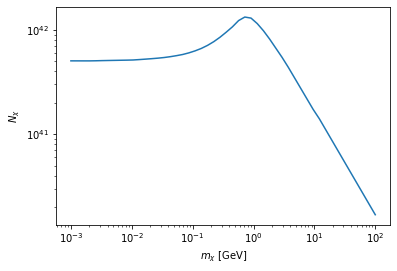

In [6]:
plt.plot(10**mx_ls,nx_ls,label='Neutron')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$m_\chi$ [GeV]')
plt.ylabel('$N_\chi$')
plt.show()

### 2.2 DM capture rate

The capture rate (# per second) can be calculated throguh `caprate`$\leftarrow m_\chi,\sigma_{\chi n}, \rho_\chi,\bar{v}_\chi$.

The meanings of the inputs are identical to `numx`. In addition, if you want to calculate the capture rate without full consideration of Pauli blocking effect, it can be done by the function `caprate_no`. The inputs are the same as `caprate`.

In [7]:
# Calculating capture rate
caprate(mx,sigxn)

2.531965937598915e+24

In [8]:
# Without full Pauli blocking effect in consideration
caprate_no(mx,sigxn)

2.781190734661818e+24

In [9]:
# Draw a plot of mass vs capture rate
mx_ls = np.linspace(-6,2,101)
cap_ls = []
for m in mx_ls:
    cap_rate = caprate(10**m,sigxn)
    cap_ls.append(cap_rate)

# no full Pauli blocking correction
cap_no_pauli_ls = []
for m in mx_ls:
    cap_no_rate = caprate_no(10**m,sigxn)
    cap_no_pauli_ls.append(cap_no_rate)

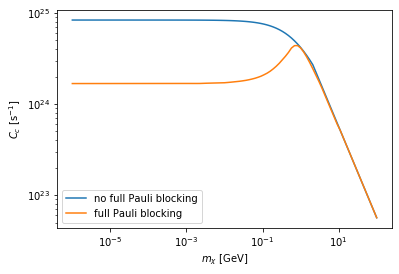

In [10]:
plt.plot(10**mx_ls,cap_no_pauli_ls,label='no full Pauli blocking')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$m_\chi$ [GeV]')
plt.ylabel('$C_c$ [s$^{-1}$]')

plt.plot(10**mx_ls,cap_ls,label='full Pauli blocking')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$m_\chi$ [GeV]')
plt.ylabel('$C_c$ [s$^{-1}$]')

plt.legend(loc='lower left')
plt.show()

### 2.3 Star consumig criteria

To determine the fate of the nearby old NS in the presence of DM with Yukawa potential, using `star_consumed`$\leftarrow m_\chi, N_\chi, m_\phi, \alpha_\chi$.

$N_\chi$ is the DM number and can be pre-calculated by `numx`, $m_\phi$ the mediator mass in MeV and $\alpha_\chi$ the dark fine-structure constant. The function will return a tuple with 1st a boolean value and 2nd a string.

In [11]:
Mx = 10    # DM mass in GeV
Mphi = 10  # mediator mass in MeV
a = 1e-2   # dark fine-structure constant

In [12]:
star_consumed(Mx,
            numx(age,Mx,sigxn),
            Mphi,a)

(False, 'Scenario (b)')

The 1st value `False` indicated the inputs will not lead to the destruction of the NS after `age`$=3\times10^{17}\,{\rm s}$. The 2nd string `'Scenario (b)'` indicated the process terminated at which state. Please check `decision_tree.pdf` for the meaning of the Scenario.

## 3 Exclusion plot over $m_\chi-m_\phi$ plane, how to calculate the data in Fig. 5

When $\alpha$ and $\sigma_{\chi n}$ are given, one can draw the exclusion region in the $m_\chi-m_\phi$ plane. Here is how we did it. We also use `open` and `write` to save the numerical results and can be plotted in any graphic apps later. The file is formatted as $(m_\chi,m_\phi,1/0)$ where 1 stands for consumed and 0 for not. 

Package `progressbar` is needed to display the current progress. If you don't want to display it, simply comment all related lines.

In [13]:
# Basic properties
Mx = np.arange(-3,7)   # GeV
Mphi = np.arange(-2,3) # MeV
age = 1.5*1e17               # seconds
alpha = 1                    # dark fine structure constant
sigxn = 1e-47                # cm**2
isospin = 1e-2
total = len(Mx)*len(Mphi)    # number of data points

# Progressbar widgets
widgets=[
    '[', Timer(), '] ',
    Bar('█'),
    ' (', Counter(), '/'+str(total)+') ',
    '[',ETA(),']',
]

In [14]:
# Calculating constraints with basic properties as the inputs

# Counter for progress bar
counter = 0
# If star_consumed encounters error, we ask the program to skip and do not save the result
skip = False

# Open a file to save the numerical results, uncomment this if needed
# constraint = open('./save/ExclPlane_a'+str(alpha)+'_sig'+str(sigxn)+'_fnfp'+str(isospin)+'.txt','a')

pbar = ProgressBar(max_value=total,widgets=widgets)
for mx in Mx:
    for mphi in Mphi:
        
        # Set the increment of the counter
        counter += 1
        
        # Uncomment the following if error happens due to the incompatible numpy type of variables
        # mx = float(mx)
        # mphi = float(mphi)
        
        # Avoid loop kernel breaking when encounters ValueError
        try:
            consumed,scen = star_consumed(10**mx,numx(age,10**mx,sigxn=sigxn,fnfp=isospin),10**mphi,alpha)
        except ValueError:
            # star_consumed encountered error, the result should be depericated, set skip_flag = True
            skip = True
        
        # Uncomment the following if you want to save the numerical result
        # Should the program save this result?
        # if skip:
             ## skip is True, ValueError encountered, skip this result and reset the skip label
        #     skip = False
        # else:
             ## No ValueError encountered, save the result
        #     constraint.write('%.5f   %.5f   %d   %s\n'%(mx,mphi,consumed*1,scen))
        
        # Updating progress bar
        pbar.update(counter)
pbar.finish()

# Uncomment the following if needed
# constraint.close()

[Elapsed Time: 0:00:01] |██████████████              | (25/50) [ETA:   0:00:01]/Users/yenhsun/Dropbox/Postdoc Projects/BH in star/code/python/dm2nsbh/core/auxfuncs.py:27: RuntimeWarning: overflow encountered in exp
  8*a*mphi*np.exp(-y)*(1/y+1)
/Users/yenhsun/Dropbox/Postdoc Projects/BH in star/code/python/dm2nsbh/core/auxfuncs.py:34: RuntimeWarning: overflow encountered in exp
  (1/y+1)*mphi
/Users/yenhsun/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/zeros.py:300: RuntimeWarning: invalid value encountered in double_scalars
  newton_step = fval / fder
[Elapsed Time: 0:00:02] |███████████████████         | (35/50) [ETA:   0:00:01]/Users/yenhsun/Dropbox/Postdoc Projects/BH in star/code/python/dm2nsbh/core/auxfuncs.py:34: RuntimeWarning: overflow encountered in double_scalars
  (1/y+1)*mphi
[Elapsed Time: 0:00:02] |████████████████████████████| (50/50) [Time:  0:00:02]
